![The Callysto Project Callyso.ca](https://github.com/callysto/curriculum-notebooks/blob/master/callysto-notebook-banner-top.jpg?raw=true)

In [ ]:
# What are base pairs and how to we use them when talking about sequences. 

<h2 align='center'>COVID-19 can infect multiple animals</h2>

Animals, such as bats or pangolins (see image below) have been found to host the COVID-19 virus. Sometimes the virus can "jump" from one animal to another when it mutates. In the exercise below, we will work with COVID-19 sequences taken from human and pangolin hosts. In particular, we will work with the region that encodes information on the "spike protein" - this special region allows the virus to enter a host's cells to replicate. 

How similar are the spike proteins of the virus found in the pangolin vs the human? 

Run the code below to find out!

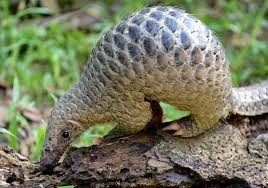

<h2 align='center'>Parsing sequence file formats</h2>

We begin this section by stating the following

<div class="alert alert-warning">
<font color="black"><b>Definition.</b> **FASTA format** is a text-based format for representing either nucleotide sequences or peptide sequences, in which base pairs or amino acids are represented using single-letter codes.  A sequence in FASTA format begins with a single-line description, followed by lines of sequence data. The description line is distinguished from the sequence data by a greater-than (">") symbol in the first column. It is recommended that all lines of text be shorter than 80 characters in length. $^{[2]}$
  </font>
</div>


<h2 align='center'>Multiple Sequence Alignment</h2>

Now that we are a bit more comfortable with comparing two sequences via a sequence alignment, we can take a step further and begin comparing more than two sequences at a time. This is known as a "multiple sequence alignment" or MSA. 

In the previous exercises, we compared two sequences at a time, using ancestral DNA sequences as reference (or ground truth) and descendant DNA sequence as test alignment, with the purpose of generating different hypothesis. 

In reality, bioinformaticians do not have access to ancestral DNA sequences, only descendant DNA sequences. 

When bioinformaticians come accross a number of descendant DNA sequences from the same species, what they do is perform an MSA on the descendant DNA sequences and make hypothesis about what the ancestral DNA sequence was. The goal is to generate a hypothesis on what the common ancestors between a given number of genes are. 

Let's suppose we are given four gene sequences, and our job is to find common ancestors. We know the gene sequences belong to Butter clam (Saxidomus gigantea) found in B.C. and we wish to perform a MSA and generate hypothesis about what the common ancestors are. 

We are given the following information about the butter clam and the file 4_saxidomus_coi.fasta (you can find this file in the main page). 

Follow the rest of the notebook to find how we as bioinformaticians would go about generating hypothesis about common ancestors. 

In [ ]:
#!pip install biopython --user

In [ ]:
import sys
from ipywidgets import Button , Layout , interact,widgets
from IPython.display import Javascript, display
import Bio
from Bio import SeqIO

In [ ]:
CoronavirusDNA = "./COVID19_reduced.fasta"
fasta = "./fasta.fas"
seq_count = 0

In [ ]:
from ipywidgets import Button , Layout , interact,widgets
from IPython.display import Javascript, display

# Function: executes previous cell on button widget click event and hides achievement indicators message

def run_current(ev):
    
    display(Javascript('IPython.notebook.execute_cell_range(IPython.notebook.get_selected_index()+0,IPython.notebook.get_selected_index()+2)'))    

seq_button_len = widgets.Button(button_style='info',description="Print Sequence Identifiers", layout=Layout(width='25%', height='30px') )
seq_button_len.on_click( run_current )


In [ ]:
seq_count +=1
display(seq_button_len)

if seq_count>=2:
    record_iterator = SeqIO.parse(CoronavirusDNA, "fasta")
    records = [record for record in record_iterator]
    for item in records:
        print(item.id)
    #print(len(item))
    #print(item.seq)
        print("\n")

Just as before, we are interested in learning what the length of each sequence is. 

Press the following button to print the length of each sequence. This button builds on top of the button above: we will see the id's we printed above along with the lengths of the sequences. 

In [ ]:
th_button_len = widgets.Button(button_style='info',description="Print Sequence Lengths", layout=Layout(width='25%', height='30px') )
th_button_len.on_click( run_current )
th_count = 0

In [ ]:
th_count +=1
display(th_button_len)

if th_count>=2:
    record_iterator = SeqIO.parse(CoronavirusDNA, "fasta")
    records = [record for record in record_iterator]
    for item in records:
        print(item.id)
        print(len(item))
    #print(item.seq)
        print("\n")

Next we want to take a look at the sequences. As before, we will build on the two applications above: we will display id, length and sequence. 

In [ ]:
se_button_len = widgets.Button(button_style='info',description="Print Sequences", layout=Layout(width='25%', height='30px') )
se_button_len.on_click( run_current )
se_count = 0

In [ ]:
se_count +=1
display(se_button_len)

if se_count>=2:
    record_iterator = SeqIO.parse(CoronavirusDNA, "fasta")
    records = [record for record in record_iterator]
    for item in records:
        print(item.id)
        print(len(item))
        print(item.seq)
        print("\n")

These are just like the DNA sequences we worked with in the first section of this notebook, the only difference being this is real and a much longer sequence. 

The natural step to take next is to perform a MSA of the four sequences in this file. 

We can do this manually, but one of the key components of bioinformatics is the use of software design to help bioinformaticians. 

Keep in mind that software is not perfect and it is common for errors to be introduced in the alignments. An important step following the MSA is to verify the alignment and make editions. Although this notebook does not provide insight into alignment edition, a reference is provided at the end of this section. 


---

<h3 align='center'>Performing a multiple sequence alignment (MSA) using Clustal</h3>

Connect previous notebook involving 2 sequences and extending to ALL sequences from all hosts. 

Clustal $^{[3]}$ is a general purpose DNA or protein multiple sequence alignment program for three or more sequences. There are two ways we can can use Clustal:

1) Online https://www.ebi.ac.uk/Tools/msa/clustalo/


2) Via downloading the installation package and running from a terminal.

The advantages of the first option are that, of course you do not need to install nor run the softare via a terminal, however the online server is limited when you are working with a large number of sequences. 

This is advantage of the latter: it can handle a large number of sequences at a time. We will try both in this assignment. 
 

**Assignment **

The button below runs a multiple sequence alignment. Press the button found below. 

In [ ]:
def run_next(ev):
    
    display(Javascript('IPython.notebook.execute_cell_range(IPython.notebook.get_selected_index()+1,IPython.notebook.get_selected_index()+2)'))    

al_button_len = widgets.Button(button_style='info',description="Perform MSA", layout=Layout(width='25%', height='30px') )
al_button_len.on_click( run_next )
display(al_button_len)

In [ ]:
from Bio import AlignIO
align = AlignIO.read("./covid19.phy", "phylip")
print(align)

<h2 align='center'>Phylogenetic Tree</h2>

Looking at how closely related they are. 

Recall that we are interested in determining common ancestors of the genes we are working with. Our goal is to establish different hypothesis regarding the ancestors based on regions of similarity within our alignment. 

A phylogenetic tree allows us to establish models for such hypothesis.

Although we will not explore in detail how to construct a phylogenetic tree, we will use IQTree $^{[5]}$ along with its modelfinder feature $^{[5]}$ to find the best possible model for our sequences. 

**Assignment **

Press the button below to generate a phylogenetic tree for our butter clam DNA sequences. 

In [ ]:
tr_button_len = widgets.Button(button_style='info',description="Plot Phylogenetic Tree", layout=Layout(width='25%', height='30px') )
tr_button_len.on_click( run_next )
display(tr_button_len)

In [ ]:
from Bio import Phylo

tree1 = Phylo.read('./tree.newick', "newick")
tree1.ladderize()   # Flip branches so deeper clades are displayed at top
Phylo.draw(tree1)
Phylo.draw_ascii(tree1)

In [ ]:
hp_button_len = widgets.Button(button_style='info',description="Plot Haplotype Network", layout=Layout(width='25%', height='30px') )
hp_button_len.on_click( run_next )
display(hp_button_len)

In [ ]:
#!pip install svglib
from svglib.svglib import svg2rlg
from reportlab.graphics import renderPDF, renderPM

drawing = svg2rlg("./covid19_hap_net2.svg")
#renderPDF.drawToFile(drawing, "file.pdf")
renderPM.drawToFile(drawing, "file.png", fmt="PNG")
from IPython.core.display import Image, display
display(Image("file.png", width=1000,unconfined=False))

<h2 align='center'>Conclusion</h2>

In this notebook we learned what a sequence is, as well as a what a sequence alignment and multiple sequence alignments are.

We performed an MSA on DNA sequences for butter clam and generated a phylogenetic tree. 

<h2 align='center'>References</h2>

https://inverts.wallawalla.edu/Mollusca/Bivalvia/Veneroida/Veneridae/Saxidomus_gigantea.html

[2] https://zhanglab.ccmb.med.umich.edu/FASTA/

[3] https://www.ebi.ac.uk/Tools/msa/clustalw2/

[4] Subha Kalyaanamoorthy, Bui Quang Minh, Thomas KF Wong, Arndt von Haeseler,
and Lars S Jermiin (2017) ModelFinder: Fast model selection for
accurate phylogenetic estimates. Nature Methods, 14:587–589.
https://doi.org/10.1038/nmeth.4285


[5] Lam-Tung Nguyen, Heiko A. Schmidt, Arndt von Haeseler, and Bui Quang Minh
(2015) IQ-TREE: A fast and effective stochastic algorithm for estimating
maximum likelihood phylogenies. Mol Biol Evol, 32:268-274.
https://doi.org/10.1093/molbev/msu300


[![logo](https://github.com/callysto/curriculum-notebooks/blob/master/callysto-notebook-banner-bottom.jpg?raw=true)](https://github.com/callysto/curriculum-notebooks/blob/master/LICENSE.md)